In [1]:
#imports here
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [2]:
x = np.array([0.03, 9.34, 0.12])

In [3]:
#Test Function
def sphere_function(x):
    return sum((x**2 - 2*x - 4)**2)

In [4]:
sphere_function(x)

4201.75747953

In [5]:
# Problem to be defined here as a class (or struct) struct = Structure
class problem:
        
        def __init__(self):

        # Cost Function
          self.cost_function = sphere_function

        # Number of genes (Variables in individual)
          self.number_of_genes = 5

        # Max Gene Value
          self.maximum_value = 10

        # Min Gene Value
          self.minimum_value = -10

In [6]:
p1 = problem()

In [7]:
p1.minimum_value

-10

In [8]:
p1.maximum_value

10

In [9]:
p1.number_of_genes

5

In [10]:
#Genetic Algorithm parameters here as class or struct
class parameters():
    def __init__(self):
               
        # Number of iterations of genetic algorithm
            self.number_of_iterations = 100
        
        # Number of individuals in population
            self.number_in_population = 50
          
        # Rate of new children per iteration
            self.child_rate = 1
            
        # Number of children    
            self.number_of_children = self.number_in_population * self.child_rate
            
         # Exploration rate (Gamma)   
            self.explore_rate = 0.1
          
         # Mutation rate - Probability that individual gene will be mutated
            self.mutation_rate = 0.2
        
        # Mutation Range - Determines the amount an individual gene will change
            self.mutation_range = 0.1
            
    def to_string(self):
        return "Iterations/Generations {} Population {} Children No {} Child Rate {} Explore Rate {} Mutation Rate {} Mutation Range {}".format(self.number_of_iterations,self.number_in_population,self.number_of_children,self.child_rate,self.explore_rate,self.mutation_rate,self.mutation_range)

In [11]:
# Structure for individual of population as class or struct
class individual:
    
    # Genotype or Chromosome
        chromosome = None
        
    # Cost for individual
        cost = 0
        
    # Constructor(s)     
        # if problem is passed as parameter to constructor, a random individual is generated
    #   https://docs.python.org/3/glossary.html#term-argument
        def __init__(self,problem = None):
               
            if problem is not None:
                self.chromosome = np.random.uniform(problem.minimum_value,problem.maximum_value,problem.number_of_genes)
                self.cost = problem.cost_function(self.chromosome)#Fitness
    
    # Crossover with another indivdual method
        def crossover(self,other_individual,explore_rate):
            child1 = deepcopy(self)
            child2 = deepcopy(other_individual)
            
            # Individual alpha for each child
            # Shape of chromosome (returns 5)
            alpha = np.random.uniform(-explore_rate, 1 + explore_rate, child1.chromosome.shape)
            child1.chromosome = alpha * self.chromosome + (1 - alpha) * other_individual.chromosome
            child2.chromosome = alpha * other_individual.chromosome + (1 - alpha) * self.chromosome
            return child1,child2
        
    # Mutate method
        def mutate(self,rate,range_of_change):
            for i in range(len(self.chromosome)):
                if np.random.rand() < rate:
                    # Normal Distribution
                    self.chromosome[i] += np.random.randn() * range_of_change


In [12]:
i = individual(p1)

In [13]:
j = individual(p1)

In [14]:
c1,c2 = i.crossover(j,0.1)

In [15]:
c1.cost,c2.cost

(4450.086456544357, 14387.35732883584)

In [16]:
i.chromosome

array([-0.27918913, -5.01856602,  8.74962986, -4.06400221, -1.74624636])

In [17]:
j.chromosome

array([-9.58887731,  0.49025479,  6.02630021, -6.39910644,  2.73866524])

In [18]:
len(c1.chromosome)

5

In [19]:
def choose_distinct_pair_from(population_size):
    index1 = np.random.randint(population_size)
    index2 = np.random.randint(population_size)
    
    if index1 == index2:
        return choose_distinct_pair_from(population_size)
    else:
        return index1,index2

In [ ]:
t = "R "
q = "w"

In [ ]:
if "Rob Sheehy" < "rob sheehy":
    print("hello")

In [20]:
choose_distinct_pair_from(3)

(0, 1)

In [21]:
i.cost

4450.086456544357

In [22]:
j.cost

14387.35732883584

In [23]:
np.random.uniform(-2,2,5)

array([ 0.99661133,  1.38502799, -1.1605371 , -1.3690901 ,  1.08050032])

In [24]:
range(0,9)

range(0, 9)

In [25]:
def run_genetic(problem, parameters, max_error):
    
    #read problem
    #Fitness Function
    cost_function = problem.cost_function
    
    #read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    #placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # Placeholder for best cost at each iteration
    #best_costs = []
    
    population = []
    
    #initialize population for the above problem. i.e. generate random individuals
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:#Cost = Fitness
            best_solution = deepcopy(new_individual)
            
    for iteration in range(number_of_iterations):      
        # generate a new population of children
        children = []
        
        # How Many Children
        while len(children) < number_of_children:
            
        # Select 2 Parents
            parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
            parent_1 = population[parent1_index]
            parent_2 = population[parent2_index]
            #print("Parent 1 {} Parent 2 {}".format(parent_1,parent_2))
            
        # Use crossover to produce 2 children
            child_1,child_2 = parent_1.crossover(parent_2, explore_rate)
            
        # Mutate these children
            child_1.mutate(mutation_rate, mutation_range)
            child_2.mutate(mutation_rate, mutation_range)
            
        # calculate costs (Fitness) for these children
            child_1.cost = cost_function(child_1.chromosome)
            child_2.cost = cost_function(child_2.chromosome)
            #print("Child 1 Cost {} Child 2 Cost {}".format(child_1.cost,child_2.cost))
                
        # add to the children population
            children.append(child_1)
            children.append(child_2)
            
        #merge parent and child populations    
        population += children
        
        #Sort into ascending order of cost
        population = sorted(population,key = lambda x: x.cost)#List of individuals
        
        #Select population next iteration
        population = population[0:number_in_population]
        
        #update best solution - Fitness
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
            
        #print iteration results
        #print("Iteration/Generation {} \nBest Cost/Fitness {} \nBest Cost Chromosome {} \n".format(iteration,best_solution.cost,best_solution.chromosome))
        #best_costs.append(best_solution.cost)
        #output results ?? class/struct/ best solution/ population?
        if best_solution.cost < max_error:
            #print("\nStopped at {} Iterations".format(iteration))
            break
            
    #plt.semilogy(best_costs)
    #plt.xlabel("Iterations")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n" + parameters.to_string())
    #print("Solution Score {}".format(best_solution.chromosome))
    return population, best_solution      

In [26]:
prob = problem()

In [27]:
pars = parameters()

In [28]:
pars.to_string()

'Iterations/Generations 100 Population 50 Children No 50 Child Rate 1 Explore Rate 0.1 Mutation Rate 0.2 Mutation Range 0.1'

In [29]:
final_pop, best_solution = run_genetic(prob,pars,0.1)

In [30]:
best_solution.chromosome

array([ 3.21440584, -1.21066442, -1.19868717, -1.27090737,  3.23075885])

In [31]:
best_solution.cost

0.07475388465193315

In [32]:
def test_genetic(number_of_runs,problem,parameters,max_error):
    start_time = time.perf_counter()
    for i in range(number_of_runs):
        run_genetic(problem,parameters,max_error)
    return time.perf_counter() - start_time

In [33]:
test_genetic(100,prob,pars,0.0001)

29.068633900000002

<h3>The code above shows the time taken for the algorithm to complete when the number of runs is 100 which uses the original parameters at the start of the notebook in the parameters class. The time takes longer when the number of runs is higher as it goes through the algorithm 100 times to show the best solution for the algortihm. That can be tweaked to search for the perfect optimal solution. The error rate here is 0.0001 which shows that the risk of an error is quite low for forming an optimal solution. Once a best solution cost goes below the error rate, the algorithm finishes if it is just one run of the algorithm or 50. The number of iterations in the parameters class is set at 100 anyway where the half of the entire population is basically children.<h3>

In [34]:
test_genetic(10,prob,pars,0.0001)

3.0962159999999983

<h3>The code above shows the time taken for the algorithm to complete when the number of runs is 10 that uses the original parameters at the start of the notebook in the parameters class. The time taken to complete this test is shorter as the number of runs is less than the first test where the genetic algortihm is carried out 100 times. With the number of children set at 50 which is half of the population where the population number is set at 100, this allows the genetic algorithm to run quite quickly. The low mutation rate which would be changed to a higher rate quickly directly impacts the time of the test shown above where the tests for both mutation rate iterations of 10 and 100 are quicker than the two tests for the orignal parameters shown above as a low mutation rate reduces the variety of the genes for the algorithm where the process actually occurs quicker when the average time of the algorithm for 100 iterations is put into play in the test for timing the runs of the algorithm using the updated mutation rate of 0.3 later on in the tests.<h3>

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out explore rate for the first time with a value of 0.1 along with the default parameters shown at the start of the notebook in the parameters class.<h1>

In [35]:
def test_explore():
    times_for_explore_rate = []
    for i in range(10):
        #pars.explore_rate = float(i) / 5.0
        times_for_explore_rate.append(test_genetic(10,prob,pars,0.1))
        print("Iteration {} \nTime for Explore Rate {}\n".format(i,pars.explore_rate,times_for_explore_rate))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Explore Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_explore_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Time for Explore Rate [1.0398476999999957]


Iteration 1 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023]


Iteration 2 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878]


Iteration 3 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878, 1.0175497999999976]


Iteration 4 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878, 1.0175497999999976, 1.1752050999999994]


Iteration 5 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878, 1.0175497999999976, 1.1752050999999994, 1.2300137999999947]


Iteration 6 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878, 1.0175497999999976, 1.1752050999999994, 1.2300137999999947, 1.3495254000000045]


Iteration 7 
Time for Explore Rate [1.0398476999999957, 1.0646830000000023, 1.0599032999999878, 1.0175497999999976, 1.1752050999999994, 1.2300137999999947, 1.3495254000000045

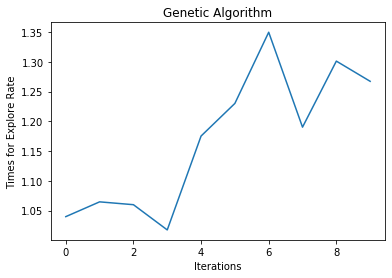

In [36]:
test_explore()

<h3>With this graph, the population size of 50 is used here where an explore rate of 0.1 is utilized that runs across 10 iterations. The mutation rate is 0.2 and the mutation range is 0.1. The explore rate variable where the iteration range is divided by 5 to increase the rate to 1.8 as the iterations progress is left out here as we are seeing how the different times have an impact on the algorithm that is triggered by the parameters to see if the best solution cost can be reached. The number of iterations used for the algorithm is 10 in this test. The best solution score of the algorithm in this case is actually reached early on in the iteration where the graph starts decreasing but rises after reaching the quickest time to perform the algortihm as the iterations progress due to the number of children in the population being 50 which peaks here at the end as the mutation range and rate are low in this first test. The times start to veer up and down later in this test as most of the parameters are quite low for now The number of children turns out to be 50 here too due to the child rate being 1 in the parameters class where the explore rate time to reach the best solution cost just below the error rate is quick at the start of the algorithm. However, the explore rate seems to have an impact on the efficiency of the algorithm as time progresses as the iteration is repeated multiple times where a higher best solution cost seems to be reached as the test progresses which veers further away from the actual best solution cost which would be lower. In these tests, the best solution cost will be shown with the best solution chromosome to compare the graph results with the expected fitness value to try and reach this optimal fitness value and the best chromosome.<h3>

<h3>The error rate for the graph tests is set at 0.1 for all of the tests where 0.0001 is used for the test_genetic algorithm with regards to the time taken to finish an iteration of the algorithm after the best solution cost goes below the error rate or when the number of iterations has reached its limit of 10 or 100 for example.<h3>

In [38]:
def test_explore_alt():
    times_for_explore_rate = []
    for i in range(100):
        #pars.explore_rate = float(i) / 5.0
        times_for_explore_rate.append(test_genetic(10,prob,pars,0.1))
        print("Iteration {} \nExplore Rate {} \nTime for Explore Rate {}\n".format(i,pars.explore_rate,times_for_explore_rate))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Explore Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_explore_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973]


Iteration 1 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034]


Iteration 2 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882]


Iteration 3 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022]


Iteration 4 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999]


Iteration 5 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981]


Iteration 6 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983]


Iteration 7 
Explore Rate 0.1 
Time for Explore Rate [1.3

Iteration 26 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063]


Iteration 27 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1

Iteration 38 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038]


Iteration 39 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.

Iteration 48 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 56 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 63 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 70 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 76 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 82 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 87 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 92 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

Iteration 97 
Explore Rate 0.1 
Time for Explore Rate [1.3734790999999973, 1.3928841000000034, 1.2206818999999882, 1.118387800000022, 1.131689399999999, 1.055370499999981, 1.1943157999999983, 1.2179744999999969, 1.4991355999999882, 1.4094373000000076, 1.183458399999978, 0.9494959000000165, 1.219477100000006, 0.9837320000000034, 1.140904699999993, 1.1567988000000184, 1.2261251000000186, 1.835768800000011, 1.1849635000000092, 1.1485214999999869, 1.4634993999999892, 1.274583299999989, 1.1942057999999918, 1.1679900999999973, 1.2736763999999994, 1.4027301999999793, 1.0861399000000063, 1.2890767000000096, 1.1214885999999922, 1.3977247999999918, 1.2306556999999998, 1.3105798999999934, 1.0882125999999914, 1.5196246000000144, 1.379776899999996, 1.235028700000015, 1.2304598999999996, 1.074028400000003, 1.0699395000000038, 1.0504866999999933, 0.9095173999999986, 1.1688539000000162, 1.2406305000000089, 1.3700525999999797, 1.244488700000005, 1.3375628000000006, 1.2455850000000055, 1.341626800000000

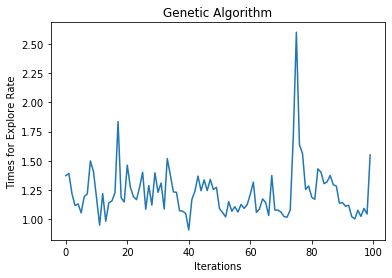

In [39]:
test_explore_alt()

<h3>This time, when the algorithm is ran 100 times, the best solution cost is reached quite quickly more frequently than the previous explore rate test as the quest towards the optimal solution begins with the switching of the parameters where the first two tests here are based on the original parameters at the beginning of the notebook. The graph increases and decreases as the 100 runs of the algorithm progresses where the algorithm takes longer towards the 3 quarters into the test than the beginning of the test. The times for the completion of each run of the algorithm get higher as the complicated process of mutation, crossover and selection in no particular order occurs. As the number of iterations progresses, the time it takes for the best solution cost to be reached or for the best solution cost of each iteration to reach or get close to the optimal solution is much longer at times than the beginning of the test as the explore rate is low at the beginning of the testing phase and the exploration phase starts to find search spaces for reaching the optimal solution. The best cost solution can be seen in the best_solution.cost line as seen earlier in this notebook as well as the best solution chromosome represented by best_solution.chromosome line that is seen early on in this notebook.<h3>

In [61]:
best_solution.cost

0.07475388465193315

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out explore rate below multiple times this time with 0.5 instead of 0.1<h1>

In [40]:
pars.explore_rate = 0.5

In [41]:
test_genetic(100,prob,pars,0.0001)

25.50013950000016

<h3>With the explore rate set at 0.5, the time it takes for 100 runs of the genetic algortihm is slightly quicker than when the explore rate is inputted as 0.1. This shows that a higher explore rate searches the search space as much as possible which would allow for an efficient way to serach for the perfect answer quickly. The exploration is done at the start of the algorithm. This makes it a little easier to find the defining solution despite a chance that an answer can be found more quickly. This test leads to a higher chance of solving the algorithm quickly in multiple iterations to reach the optimal solution in a short time period especially at the start of the testing of the algorithm. Exploration does not work as well in the end where the Gamma rate would reduce the overtime as exploration is meant to build a better estimate to get new knowledge and try the values out. The exploitation would see which value is good locally and uses all prior experience as knowledge.<h3>

In [42]:
test_genetic(10,prob,pars,0.0001)

2.781054900000072

<h3>Surprisingly, the time to compute the genetic algorithm across ten runs shown above occurs quicker than when the explore rate is set at 0.1 compared to 0.5. The value may be lower than 1 for example for the explore rate but it looks like the target could be reached within the optimal solution answer where the cost would be reached once a best cost solution goes less than the error rate. A higher exploration rate results in a slightly shorter time period to reach the optimal cost or to get as close to the best solution as possible than when the explore rate was set up at 0.1.<h3>

Iteration 0 
Time for Explore Rate [1.342952299999979]


Iteration 1 
Time for Explore Rate [1.342952299999979, 1.318701300000157]


Iteration 2 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038]


Iteration 3 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038, 1.6382501000000502]


Iteration 4 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038, 1.6382501000000502, 1.4001276000001326]


Iteration 5 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038, 1.6382501000000502, 1.4001276000001326, 1.2987324000000626]


Iteration 6 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038, 1.6382501000000502, 1.4001276000001326, 1.2987324000000626, 1.2273007999999663]


Iteration 7 
Time for Explore Rate [1.342952299999979, 1.318701300000157, 1.7532721000000038, 1.6382501000000502, 1.4001276000001326, 1.2987324000000626, 1.2273007999999663, 1.23078140000

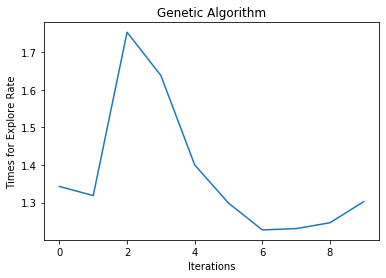

In [43]:
test_explore()

<h3>This time in the graph above, the population size of 50 is still used here where a different explore rate of 0.5 is utilized that runs across 10 iterations. The mutation rate is also 0.2 and the mutation range is 0.1. The number of iterations used for the algorithm is 20 in this test. The best solution score of the algorithm in this case is reached at an earlier point as the previously set example of 0.1 for the explore rate. The graph starts decreasing to reach its optimal solution before it rises again and slides downwards briefly before it rises again. The last time at the end is slower at completing the algorithm than the first explore rate test as it proves that a lower explore rate has a better chance of reaching the optimal solution depending on the test that is carried out. The maximum number of generations has been reached here where it goes as far as 10 rather than 200. This shows that a lower explore rate can ensure a better best fitness cost to acquire the optimal solution when the explore rate is lowered quicker at 0.1 which was tested earlier on 10 and 20 runs.<h3>

<h3>It seems that when the explore rate is set at 0.5, the graph above for testing out the algorithm 10 times is closest to the mean / normal distribution which would clearly form the optimal solution if this was the case as at the start, a gradual increase occurs and then it peaks almost halfway throgh the test and then it decreases gradually before rising again at the end of the test. This may be the graph with the best parameters where the updated explore rate is set at 0.5 and the other parameters are unchanged.<h3>

Iteration 0 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431]


Iteration 1 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127]


Iteration 2 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367]


Iteration 3 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877]


Iteration 4 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947]


Iteration 5 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066]


Iteration 6 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782]


Iteration 7 
Explore Rate 0.5 
Time for Explore Rate

Iteration 26 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277]


Iteration 27 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.793926800000008

Iteration 38 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434]


Iteration 39 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001

Iteration 48 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 56 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 63 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 69 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 75 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 81 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 86 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 91 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

Iteration 96 
Explore Rate 0.5 
Time for Explore Rate [1.4322650000001431, 1.7031425000000127, 1.2830266999999367, 1.475841199999877, 1.2860881999999947, 1.2231071000001066, 1.1308498000000782, 1.8195515999998406, 1.8954352000000654, 1.9007328000000143, 1.9608909999999469, 1.7002813999999944, 1.3415706000000682, 1.4680716999998822, 1.302954699999873, 1.1507424999999785, 1.177947500000073, 1.7939268000000084, 1.796566700000085, 1.931787199999917, 1.8072855999998865, 1.1974199999999655, 1.0673214000000826, 1.3642555999999786, 1.395275300000094, 1.2238090999999258, 1.1493882999998277, 1.8210476999997809, 1.9130186999998386, 1.8204854999999043, 1.6221797999999126, 1.3492310999999972, 1.1117538999999397, 1.1775755999999546, 1.5050633999999263, 1.5716687999999976, 1.2176255000001674, 1.3007764999999836, 1.2311878000000434, 1.0881537000000208, 1.5200784000001022, 1.8118952999998328, 1.686236000000008, 1.94693970000003, 1.8569461999998111, 2.129688899999792, 1.223319100000026, 1.20804930000008

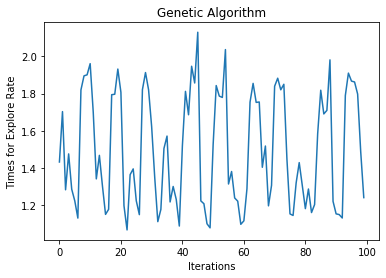

In [44]:
test_explore_alt()

<h3>The time taken to accomplish the genetic algorithm when running the algorithm 100 times is longer in general than previous tests acccording to this graph but it occurs less times as the solution heads under the error rate in short amounts of time thoughout the test when it runs multiple times. At one point, When the solution runs 100 times, the best cost is reached in short time periods in more iterations than other tests when the test is performed 100 times compared to 10 times. It shows how the Gamma value determines when the exploitation comes into effect where the exploration is carried out at the start and not the end when exploitation is performed to search for a preferable path that offers rewards immediately when exploiting the opportunistic paths when performing exploration. With exploration here, the entire search space is searched over to find other beneficial solutions to problems that must be edited which is known as a global search.<h3>

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out number of iterations set at 200 to see what would happen with all of the existing parameters whether original at the start or the values updated later on. (Save this one for last before looking at second part of CA)<h1>

In [94]:
pars.number_of_iterations = 200

In [146]:
pars.to_string()

'Iterations/Generations 200 Population 150 Children No 300 Child Rate 2 Explore Rate 0.5 Mutation Rate 0.3 Mutation Range 0.2'

In [148]:
test_genetic(10,prob,pars,0.0001)

16.948973800001113

<h3>With a higher number of iterations that is set at 200 when the iteration parameter is changed, it is clear that the time it takes for the genetic algorithm to be completed when both the number of runs are set at 10 and 100 is much longer than the time it takes when 100 iterations are used. The time would be shorter if less iterations were used for the algorithm when the number of runs is put at 10 during the testing of the genetic algorithm. A graph for 200 iterations would take too long to form considering the iterations would be bigger and it would take a longer while to carry out the genetic algorithm than when the iterations is set at 100. An error rate of 0.0001 is used where the running of the algorithm finishes after an iteration of the algorithm finishes with the best solution of that run in an iteration going under the error rate. The graphs would likely display that the average time to complete the iteration when the number of iterations is set at 200 would be fluctuating a lot of the time and it would tak the longest time out of the tests unless the population number was set at a high value like 250 from the original value of 100. The graph for the 10 runs looks almost like a natural distribution when working out how the times have an impact on which parameters work best to get close to the optimal solution as best as possible. When the cost function is low, the fitness will be high which would confirm the best possible solution.<h3>

Iteration 0 
Time for Explore Rate [5.207398899998225]


Iteration 1 
Time for Explore Rate [5.207398899998225, 5.5476168999994115]


Iteration 2 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932]


Iteration 3 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932, 5.676510999997845]


Iteration 4 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932, 5.676510999997845, 5.018583699998999]


Iteration 5 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932, 5.676510999997845, 5.018583699998999, 5.51458249999996]


Iteration 6 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932, 5.676510999997845, 5.018583699998999, 5.51458249999996, 5.574269400000048]


Iteration 7 
Time for Explore Rate [5.207398899998225, 5.5476168999994115, 8.70239009999932, 5.676510999997845, 5.018583699998999, 5.51458249999996, 5.574269400000048, 4.905664399997477]


Iteration 8 
T

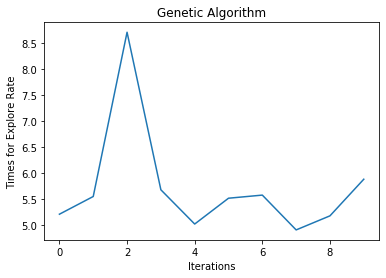

In [149]:
test_explore()

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out mutation range below multiple times with 0.2 value combined with explore rate of 0.5 from earlier on.<h1>

In [56]:
pars.mutation_range = 0.2

In [47]:
pars.to_string()

'Iterations/Generations 100 Population 50 Children No 50 Child Rate 1 Explore Rate 0.5 Mutation Rate 0.2 Mutation Range 0.2'

In [48]:
test_genetic(100,prob,pars,0.0001)

32.45899910000003

<h3>The test for the number of runs is set at 100 where the mutation range is set at 0.2 rather than 0.1. The greater mutation range would allow for determining the amount that the individual gene would change by which in this case would increase the chance of an individual gene changing based on the gene array which contains 5 floating point numbers. The time it takes for the genetic algorithm to last 100 runs here is unsurprisingly higher when the higher mutation range is present as well as the updated explore rate of 0.5.<h3>

In [49]:
test_genetic(10,prob,pars,0.0001)

2.982093800000257

<h3>The time taken for the algortihm to finish is longer than an explore rate test with 0.1 which involves 10 as the number of runs as the mutation range is 0.1 higher than the initial value when the mutation range was set at 0.1. In this case, the mutation range is set at 0.2 in addition to the updated parameter of the explore rate at 0.5 as mentioned earlier on. This higher exploration and mutation range could bring us further away from the optimal solution during multiple runs of the algorithm when the explore rate is quick at the beginning but it slows down eventually during the later iterations due to the higher best solution costs.<h3>

In [57]:
def test_mutation_range():
    times_for_mutation_range = []
    for i in range(10):
        #pars.explore_rate = float(i) / 5.0
        times_for_mutation_range.append(test_genetic(10,prob,pars,0.1)) 
        print("Iteration {} \nMutation Range {} \nTime for Mutation Range {}".format(i,pars.mutation_range,times_for_mutation_range))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Mutation Range")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_range)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969]

Iteration 1 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108]

Iteration 2 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108, 1.5633287000000564]

Iteration 3 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108, 1.5633287000000564, 1.579713200000242]

Iteration 4 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108, 1.5633287000000564, 1.579713200000242, 1.2514878000001772]

Iteration 5 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108, 1.5633287000000564, 1.579713200000242, 1.2514878000001772, 1.944190200000321]

Iteration 6 
Mutation Range 0.2 
Time for Mutation Range [1.35517499999969, 1.2199217999996108, 1.5633287000000564, 1.579713200000242, 1.2514878000001772, 1.944190200000321, 2.0106352000002516]

Iteration 7 
Mutation Range 0.2 
Time for Mutat

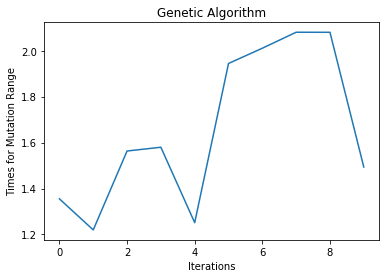

In [58]:
test_mutation_range()

<h3>When the mutation range is changed to 0.2 compared to the original value of 0.1, the graph shows that the time to complete the algorithm for each iteration increases once the generations of the algorithm begins and the final score in the last iteration turns out to be lower than the starting time at the first iteration. The score peaks early on according to the graph where the range of mutation to determine the amount that an individual gene will change by is higher as the best solution cost is reached in a slower amount of time due to the edited parameters of the explore rate and the mutation range. This would result in higher costs for the algorithm in general as the higher the fitness cost, the better the problem will be when attempting to reach the optimal solution. Once the peak occurs at the shortest time to reach the best solution cost or to get close to it, the graph varies from a gradual increase to a gradual decrease and so on occurs as the genes do not exactly vary afterwards where the graph seems to rise in different iterations that represents the mutation range. It basically fluctuates as the offspring is created and emerges from the parents after crossover and mutation are applied. If more iterations were put in, the results could be expanded upon to form the optimal solution when modifying the parameters in the first part. This mutation range value is now edited alongside the explore rate.<h3>

In [59]:
def test_mutation_range_alt():
    times_for_mutation_range = []
    for i in range(100):
        #pars.mutation_range = float(i) / 5.0
        times_for_mutation_range.append(test_genetic(10,prob,pars,0.1))
        print("Iteration {} \nMutation Range {} \nTime for Mutation Range {}\n".format(i,pars.mutation_range,times_for_mutation_range))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Mutation Range")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_range)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362]


Iteration 1 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599]


Iteration 2 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446]


Iteration 3 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323]


Iteration 4 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207]


Iteration 5 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424]


Iteration 6 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416]


Iteration 7 
Mutation Ra

Iteration 26 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677]


Iteration 27 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000

Iteration 38 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106]


Iteration 39 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.075599199

Iteration 47 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 55 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 62 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 69 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 75 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 81 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 86 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 91 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

Iteration 96 
Mutation Range 0.2 
Time for Mutation Range [1.6673362000001362, 1.4751042000002599, 1.1972365000001446, 1.541595800000323, 2.1984158000000207, 2.0755991999999424, 2.2150556000001416, 1.8879456999998183, 1.4102065000001858, 2.226209899999958, 2.264797499999986, 2.0223426999996263, 1.861537600000247, 2.088495399999829, 1.3225022999999965, 1.4672256999997444, 1.5028708999998344, 1.5155789000000368, 1.6120621999998548, 1.457917599999746, 1.187955200000033, 1.5603328000001966, 1.9988941000001432, 2.2196530000001076, 1.8877972999998747, 1.9847974000003887, 1.5840123000002677, 1.8271061000000373, 1.4642668999999842, 1.556627699999808, 1.4708200000000033, 1.3690013999998882, 1.3725769999996373, 1.4897216999997909, 1.3134887999999592, 1.3425818999999137, 2.0111573000003773, 2.490104500000143, 1.828659400000106, 1.4223799999999756, 1.3154874000001655, 1.345135499999742, 1.3370739000001777, 1.2319946999996318, 1.8936712999998235, 2.1643677999995816, 2.2425029999999424, 2.0423036999

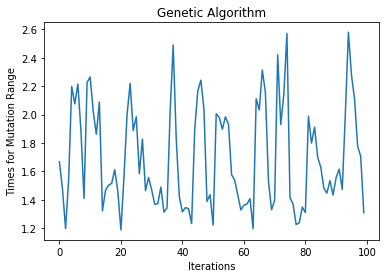

In [60]:
test_mutation_range_alt()

<h3>The cost cannot be reached when the number of runs are tested out whether it is 10 (Main number of runs to be tested out on all various tests here) or 100 because the mutation range is set up at 0.2 compared to 0.1 which has a bigger chance of determining the amount that the individual gene would change by. The time it takes the mutation range to play a role in the genetic algorithm is significant where the graph fluctuates between high and low during the 100 times that the genetic algorithm is ran. The higher mutation range along with the edited explore rate and the unchanged parameters at the start of the notebook in the parameters class causes the graph values to get much higher than the time taken to end the algorithm in the first test involving 10 runs as seen in the first graph which was explained earlier where the algorithm takes longer in a majority of the runs of the algorithm here to reach the best optimal solution that is defined when the target best solution and chromosome is revealed. Although the graph does not reach the solution quickly in more iterations than the first mutation rate test when the algorithm is ran 10 times where the cost is only reached in a short time period during a couple of runs of the algorithm in the test above compared to the test that is ran 10 times where the best solution was closely reached in a short time period twice in the test of 10 iterations of the time taken to complete the algorithm based on the updated parameters so far. It is ran here 100 times where the graph seems to show a normal fluctuating graph with regards to the time depending on the changes made to the parameters where the cost has a good enough chance of being reached when there is a higher mutation range. The general time to complete a run of the algorithm is longer for the most part than the previous tests before this one<h3>

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out mutation rate below multiple times with 0.3 value combined with explore rate of 0.5 and mutation range of 0.2 from earlier on as well as the remaining original parameter values.<h1>

In [93]:
pars.mutation_rate = 0.3

In [67]:
test_genetic(100,prob,pars,0.1)

18.183755900000506

<h3>The mutation rate has changed to 0.3 in this test as it is clear that the test for the genetic algorithm which runs 10 times combined with the changed explore rate and mutation range from earlier allows for the ime to take longer to complete the algorithm. The higher the mutation rate, the better chance there is of reaching the perfect solution when the chances of mutation within an individual gene are higher.<h3>

In [68]:
test_genetic(10,prob,pars,0.1)

1.6014893000001393

<h3>The time for the number of runs taken when the genetic algorithm occurs is shorteer than the previous tests as the mutation rate is bigger than the original mutation rate value of 0.1. This is because the mutation rate here in this test has a higher probability that the individual gene will be mutated. This enables the test to be completed in a shorter time period.<h3>

In [72]:
def test_mutation_rate():
    times_for_mutation_rate = []
    for i in range(10):
        #pars.mutation_rate = float(i) / 5.0
        times_for_mutation_rate.append(test_genetic(10,prob,pars,0.1)) 
        print("Iteration {} \nMutation Rate {} \nTime for Mutation Rate {}\n".format(i,pars.mutation_rate,times_for_mutation_rate))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Mutation Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [76]:
pars.to_string()

'Iterations/Generations 100 Population 50 Children No 50 Child Rate 1 Explore Rate 0.5 Mutation Rate 0.3 Mutation Range 0.2'

Iteration 0 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853]


Iteration 1 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696]


Iteration 2 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696, 1.8413860999999088]


Iteration 3 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696, 1.8413860999999088, 1.6800278000000617]


Iteration 4 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696, 1.8413860999999088, 1.6800278000000617, 1.5486252000000604]


Iteration 5 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696, 1.8413860999999088, 1.6800278000000617, 1.5486252000000604, 1.452170099999421]


Iteration 6 
Mutation Rate 0.3 
Time for Mutation Rate [2.0157930000004853, 2.0044745000004696, 1.8413860999999088, 1.6800278000000617, 1.5486252000000604, 1.452170099999421, 1.7263191000001825]


Iteration 7 
Mutation Rate 0.3 
Time

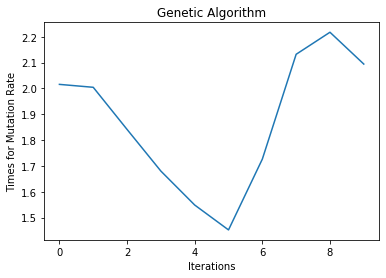

In [77]:
test_mutation_rate()

<h3>The graph begins with a stagnant movement where the same time is reached for the best solution cost to be reached which increases and decreases naturally where the best time to reach the cost occurs just after the halfway mark of testing out the algorithm 10 times involving the updated mutation rate set at 0.3 alongside the updated explore rate and mutation range values. It shows that when a higher mutation rate is put in for testing out the genetic algorithm, this boosts the chance of more mutation occurring which would enable the exploration of other sections of the solution space. However, this can also cause the algorithm to not converge as suitable solutions would simply be lost where a higher diverse range of genetic variety is recommended to reach the best possible solution.<h3>

In [81]:
def test_mutation_rate_alt():
    times_for_mutation_rate = []
    for i in range(100):
        #pars.mutation_rate = float(i) / 5.0
        times_for_mutation_rate.append(test_genetic(10,prob,pars,0.1))  
        print("Iteration {} \nMutation Rate {} \nTime for Mutation Rate {}\n".format(i,pars.mutation_rate,times_for_mutation_rate))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Mutation Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316]


Iteration 1 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178]


Iteration 2 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581]


Iteration 3 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775]


Iteration 4 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696]


Iteration 5 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788]


Iteration 6 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604]


Iteration 7 
Mutation Rate 0.3 
Time for

Iteration 26 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291]


Iteration 27 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.

Iteration 38 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689]


Iteration 39 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 

Iteration 48 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 56 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 63 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 69 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 75 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 81 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 86 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 91 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

Iteration 96 
Mutation Rate 0.3 
Time for Mutation Rate [1.7145282000001316, 1.2791391999999178, 1.8587009000002581, 2.1779969999997775, 2.561724299999696, 2.419383399999788, 1.837584799999604, 1.5159450000001016, 2.128504499999508, 1.8282649000002493, 1.4731150999996316, 1.2598238000000492, 1.541152200000397, 1.296498700000484, 2.1003067999999985, 2.524274900000819, 2.353934300000219, 2.4767289000001256, 1.3769331000003149, 1.3089595000001282, 1.2522791999999754, 1.9855285000003278, 1.7475039000000834, 1.378364899999724, 1.3950721000001067, 1.314481600000363, 1.6271650999997291, 2.5025087999993048, 1.440078600000561, 1.7659622000001036, 1.6928470000002562, 1.8526808000005985, 1.5403943999999683, 1.699134999999842, 1.398573899999974, 1.9581946999996944, 2.9987836000000243, 2.1363227000001643, 1.740108799999689, 1.3842364000001908, 1.3646749999998065, 1.2934810999995534, 1.3258705999996891, 2.2023643000002266, 2.8706215000001976, 2.6163814000001366, 2.230251199999657, 2.4658331999999064

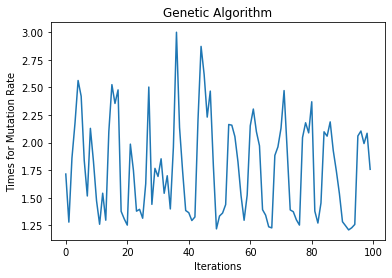

In [82]:
test_mutation_rate_alt()

<h3>With the number of runs set at 100 for the graph above which would mainly focus on the mutation rate with the other updated values,the shortest time taken for the algorithm occurs towards the end of the iteration where the mutation rate determines if more mutation would occur invloving a singular individual. This mutation process frequently increases the times taken to complete an iteration of the genetic algorithm as it tries to reach more search spaces to get to the optimal cost. If the rate of mutation is massive, more areas would be searched in the search space whereas a very low mutation rate would lead to better results as seen earlier in the test of the original parameters where the mutation rate is set at 0.1.<h3>

<h2>------------------------------------------------------------------------------------------<h2>

<h1>Testing out child rate, number of children and population below multiple times with value of 5 and 250 respectively before population changes combined with majority of updated parameters from earlier on where the number of iterations is not updated here.(The second last test).<h1>

In [117]:
pars.child_rate = 2

In [123]:
pars.number_in_population = 150

In [124]:
pars.number_of_children = pars.number_in_population * pars.child_rate

In [125]:
pars.number_of_children

300

In [126]:
pars.to_string()

'Iterations/Generations 200 Population 150 Children No 300 Child Rate 2 Explore Rate 0.5 Mutation Rate 0.3 Mutation Range 0.2'

In [127]:
test_genetic(100,prob,pars,0.1)

61.69169229999898

<h3>The child rate is set to 3 as well as the number in population which is set at 200 and the updated number of children is revealed here too to test out the algorithm here. All the parameters are updated at this point The time it takes to run the genetic algorithm here is slower than all of the previous tests. This is where the number of runs was 100 because all of the changed parameters as tested out here for the first CA have a major impact on the cost of the algorithm where the higher the fitness cost, the closer we hopefully get to the optimal solution. But, it seems the lower the solution, the better the fitness cost will be.<h3>

In [128]:
test_genetic(10,prob,pars,0.1)

6.036692199999379

<h3>Meanwhile, the test by using the number of runs for the test of the genetic algorithm is unsurprisingly slower when the rest of the parameters including a higher child rate are placed in these two test_genetic() tests than the tests when the values of the mutation rate and range were performed and implemented earlier on. This is because the child rate and all the other updated parameters except for the number of iterations including the population of 200 is much higher than all the other parameters in the parameters class This allows for much more children to be born in every iteration when combined with the edited mutation rate and range and the other paramaters as there is a greater possibility that the optimal solution would be reached when multiple iterations of the algorithm are carried out. This would hopefully allow plenty of the iterations to last a shorter amount of time than some of the previous tests carried out when the scientific methodology is put into perspective here.<h3>

In [140]:
def test_algorithm():
    times_for_algorithm = []
    for i in range(20):
        #pars.child_rate = float(i) / 5.0
        times_for_algorithm.append(test_genetic(10,prob,pars,0.1))
        print("Iteration {} \nChild Rate {} \nTime for Algorithm {}\n".format(i,pars.child_rate,times_for_algorithm))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for updated parameters excluding iterations number")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_algorithm)
    print("Cost {} Best Solution Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Iteration 0 
Child Rate 2 
Time for Algorithm [6.593744100002368]


Iteration 1 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183]


Iteration 2 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779]


Iteration 3 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779, 7.6451419000004535]


Iteration 4 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779, 7.6451419000004535, 6.8014265000019805]


Iteration 5 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779, 7.6451419000004535, 6.8014265000019805, 7.274962499999674]


Iteration 6 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779, 7.6451419000004535, 6.8014265000019805, 7.274962499999674, 7.3236958000015875]


Iteration 7 
Child Rate 2 
Time for Algorithm [6.593744100002368, 9.154948100000183, 5.534493899998779, 7.64514190000

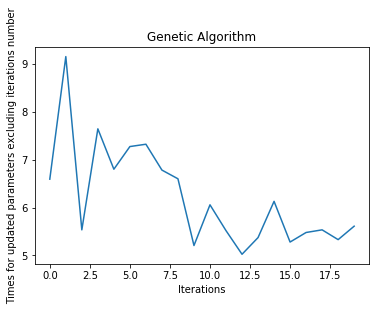

In [141]:
test_algorithm()

<h3>With the child rate set at 5 as well as all of the other parameters except for the number of iterations, there is a chance that graph flow would fluctuate from high to low with regards to the time as the rate of children is higher when the population remains at 50 in this case.The time taken to finish the algorithm suddenly takes longer than usual when ran 100 times because the child rate here determines the number of new children per iteration which would slow down the algorithm and lead to the fluctuating results. The graph starts with a little increase of time which then decreases gradually and so on. After this, it switches between a higher time period and a lower time period where the average time is surprisingly the same as the child rate test when ran 10 times as the high child rate has a major impact on the algorithm where it seems the tests would veer between short implementations of the algortihm and longer times for implementing the method. This shows that when the parameters are updated to a bigger value, it will increase the time taken to complete the algorithm which may search through more search spaces to find the optimal solution and use previous experiences of the test as knowledge to see which values are best to be closest to the best solution cost and best chromosome.<h3>

<h3>With regards to the ideal population when it is set higher, it may be ideal but it is not as efficient as the earlier examples involving the preset parameters because with the emergence of multiple costs and chromosomes to see which ones are closest to the best solution, there's a better chance when there is a lower population where the best solution may be more likely to be reached as the best solution cost is reached when it goes below the error rate<h3>

In [142]:
def test_algorithm_alt():
    times_for_algorithm = []
    for i in range(10):
        #pars.child_rate = float(i) / 5.0
        times_for_algorithm.append(test_genetic(10,prob,pars,0.1))
        print("Iteration {} \nChild Rate {} \nTime for algorithm {}\n".format(i,pars.child_rate,times_for_algorithm))
        print()
    plt.xlabel("Iterations")
    plt.ylabel("Times for Child Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_algorithm)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [143]:
pars.to_string()

'Iterations/Generations 200 Population 150 Children No 300 Child Rate 2 Explore Rate 0.5 Mutation Rate 0.3 Mutation Range 0.2'

Iteration 0 
Child Rate 2 
Time for algorithm [6.188006599997607]


Iteration 1 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953]


Iteration 2 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707]


Iteration 3 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707, 5.706392399999459]


Iteration 4 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707, 5.706392399999459, 5.596647200000007]


Iteration 5 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707, 5.706392399999459, 5.596647200000007, 8.57147989999794]


Iteration 6 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707, 5.706392399999459, 5.596647200000007, 8.57147989999794, 5.747948800002632]


Iteration 7 
Child Rate 2 
Time for algorithm [6.188006599997607, 6.562230399998953, 5.958351900000707, 5.706392399999459, 5.59

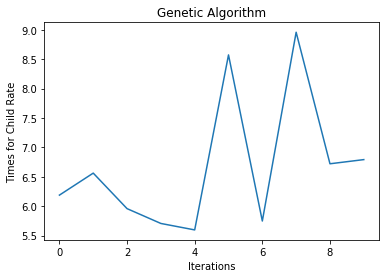

In [144]:
test_algorithm_alt()

<h3>This algorithm does not look close to the optimal solution where a mean distribution would occur if the perfect solution is reached. A mean distribution is expected in a test to ensure that the path to the optimal solution is improved on when searching the values to determine which value is closest to the solution you are looking for when the solutiom target is calculated. The child rate is updated along with every other updated parameter other than the number of iterations parameter. This would account for the time taken to reveal all of the fitness costs and reveal the best solution costs for each iteration of the algorithm. The graph naturally increases and decreases after the halfway mark of the testing of the algorithm. For the majority of the test, the time taken to complete the algorithm decreases in most iterations due to the presence of the child rate. It may fluctuate at the beginning of the test with the graph figures as the test is appended to try and accommodate for the best score so far in the algorithm. More tweaking of the parameters would probably lead to a much improved solution which can be fixed when the algortihm is changed and edited soon. When it peaks at the longest time, it is certain that this would happen as the parameter values are higher than previous parameter values. That shows the impact that a high child rate would have on different tests of the algorithm using the multiple parameters. The average time taken here for the testing of the child rate is unsurprisingly longer than other tests which ran 10 times as the amount of new children per iteration is much higher which would go well above the total population unless the population is much higher than the children when the number of children is calculated by multiplying the child rate by the number in the population. <h3>

<h2>------------------------------------------------------------------------------------------<h2>

In [ ]:
final_pop[0].chromosome

In [ ]:
q = parameters()

In [ ]:
pop = run_genetic(p1, q, 0.0001)

In [ ]:
pop, best_soln = run_genetic(p1,q,0.0001)

In [ ]:
pop[5].chromosome

In [ ]:
best_soln.chromosome

In [ ]:
plt.plot(best_solution.chromosome)

<h1>Alternative version of the genetic algorithm with a couple of tweaks to the algorithm for final tests<h1>

In [165]:
def roulette_selection(pop, fitness_no, number):
    sum_fitness = float(sum(fitness_no))
    relate_fitness = [fit / sum_fitness for fit in fitnesses]
    # Generate probability intervals for each individual
    problems = [sum(relate_fitness[:i+1]) for i in range(len(relate_fitness))]
    # Draw new population
    new_pop = []
    for n in xrange(num):
        r = rand()
        for (i, individ) in enumerate(pop):
            if r <= problems[i]:
                new_pop.append(individ)
                break
    return new_pop

In [166]:
def run_genetic_alt(problem, parameters, max_error):
    
    #read problem
    #Fitness Function
    cost_function = problem.cost_function
    
    #read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    #placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # Placeholder for best cost at each iteration
    best_costs = []
    
    population = []
    
    #initialize population for the above problem. i.e. generate random individuals
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:#Cost = Fitness
            best_solution = deepcopy(new_individual)
            
    for iteration in range(number_of_iterations):      
        # generate a new population of children
        children = []
        
        # How Many Children
        while len(children) < number_of_children:
            
        # Select 2 Parents
            #parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
            parent1_index, parent2_index = select_parent_roulette(number_in_population)
            parent_1 = population[parent1_index]
            parent_2 = population[parent2_index]
            
        # Use crossover to produce 2 children
            child_1,child_2 = parent_1.crossover(parent_2, explore_rate)
            
        # Mutate these children
            child_1.mutate(mutation_rate, mutation_range)
            child_2.mutate(mutation_rate, mutation_range)
            
        # calculate costs (Fitness) for these children
            child_1.cost = cost_function(child_1.chromosome)
            child_2.cost = cost_function(child_2.chromosome)
                
        # add to the children population
            children.append(child_1)
            children.append(child_2)
            
        #merge parent and child populations    
        population += children
        
        #Sort into ascending order of cost
        population = sorted(population, key = lambda x: x.cost)
        
        #Select population next iteration
        population = population[0:number_in_population]
        
        #update best solution - Fitness
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
            
        #print iteration results
        #print("Iteration/Generation {} Cost/Fitness {}".format(iteration, best_solution.cost))
        #best_costs.append(best_solution.cost)
        #output results ?? class/struct/ best solution/ population?
        if best_solution.cost < max_error:
            #print("Stopped at {} Iterations".format(iteration))
            break
            
    #plt.semilogy(best_costs)
    #plt.xlabel("Iterations")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n" + parameters.to_string())
    #print("Solution Score {}".format(best_solution.chromosome))
    return population, best_solution      

In [167]:
prob_alt = problem()

In [168]:
para = parameters()

In [169]:
popula, best_solut = run_genetic_alt(prob_alt,para,0.0001)

TypeError: select_parent_roulette() missing 1 required positional argument: 'pop'

In [ ]:
best_solut.chromosome

In [ ]:
best_solut.cost